#### Question:

In real world, data never comes in a tidy (n_sample, n_features) matrix.
- How to turn information into numbers that I can use to build my feature matrix ? This is **Feature Engineering**

- How to reprensent:
    - Categorical features
    - Text
    - Images
    - Derived features (to increase model complexity)
    - Imputation of missing data

In [20]:
## Categorical Features
# Convert categories into numerical features
import pandas as pd

data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]
# "neigborhood" is a categorical feature

# One hot encoding: Create extra binary column indicating the presence or absence of a category
# When data comes as a list of dict, we can use DictVectorizer

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse = False, # Wether the model transform() should produce a scipy.sparce matrice
                     dtype = int # Type of the feature values
                     )
vec.fit(data) # Learn a list of feature name
print("Feature matrix after transformation: \n", vec.transform(data)) # Transform the features to sparce matrix
print("Columns names: \n", vec.get_feature_names())
# The "neighborhood" column has been expanded into 3 binary columns

display(pd.DataFrame(data = vec.transform(data),
                     columns= vec.get_feature_names()))

# Problem -> Increase too much the size of the dataset

Feature matrix after transformation: 
 [[     0      1      0 850000      4]
 [     1      0      0 700000      3]
 [     0      0      1 650000      3]
 [     1      0      0 600000      2]]
Columns names: 
 ['neighborhood=Fremont', 'neighborhood=Queen Anne', 'neighborhood=Wallingford', 'price', 'rooms']


,neighborhood=Fremont,neighborhood=Queen Anne,neighborhood=Wallingford,price,rooms
0,0,1,0,850000,4
1,1,0,0,700000,3
2,0,0,1,650000,3
3,1,0,0,600000,2


In [32]:
## Text Features (Word count)
# Convert text to numerical feature

sample = ['problem of evil',
          'evil queen',
          'horizon problem']

# Word count: Create a new column for each word(e.g. "problem") with number of occurences
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample) # Return a CountVectorizer object
pd.DataFrame(X.toarray(),
             columns = vec.get_feature_names())

# Problem: Lead to feature which put too much weight on words that appear very frequently
# Solution: Term Frequency-Inverse Document Frequency (TF-IDF).
#           Give a higher weight to words not frequently used
#           Increase the value of a word if it is not frequently used

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [34]:
## Text Features (TF-IDF)

from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns = vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

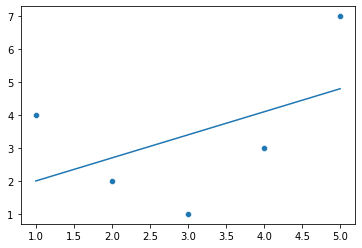

In [56]:
## Derived Features
# Feature which is mathematically derived from some input features

# Following data cannot be well described by a straight line
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
sns.scatterplot(x, y)

from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis]
model = LinearRegression()
model.fit(X, y)
y_model = model.predict(X)
sns.lineplot(x, y_model)


In [68]:
y

array([4, 2, 1, 3, 7])

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/nicolas/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

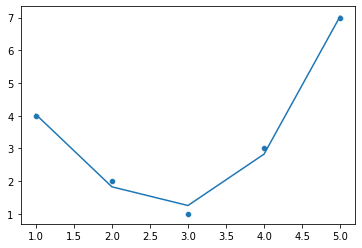

In [71]:
# Add polynomial features to the data to drive more flexibility in the model

from sklearn.preprocessing import PolynomialFeatures

# Generate a new feature matrix consisting of all polymial combinations of the features with degree less than 3
# If a sample has 2 features: [a, b], then the degree-2 polynomial features are:
# [1, a, b, a^2, ab, b^2].
poly_features = PolynomialFeatures(degree = 3, include_bias=False)
X2 = poly_features.fit_transform(X)
print(X2)

# Col 1 = x
# Col 2 = x^2
# Col 3 = x^3

# Now, if we still compute a LinearRegression on the expand data, we'll get a better model
model2 = LinearRegression()
y_model_2 = model2.fit(X2, y).predict(X2)
sns.scatterplot(x, y)
sns.lineplot(x, y_model_2)

In [78]:
## Imputation of Missing Data

X = np.array([[np.nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   np.nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

# Replace missing value with mean ? median ? Most frequent value ? Other techniques ?

from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean') # Column-wise by default
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [83]:
## Feature pipeline

# Bundle the following step into a single model
# 1. Impute missing values using the mean
# 2. Transform features to quadratic
# 3. Fit a Linear Regression

from sklearn.pipeline import make_pipeline

model = make_pipeline(Imputer(strategy = "mean"),
                      PolynomialFeatures(degree = 3, include_bias=False),
                      LinearRegression())

model.fit(X, y)
y_model = model.predict(X)


array([14., 16., -1.,  8., -5.])

### Concept Summary:
    
- **Categorical features:**
    - One-hot encoding: Add binary column for each item in the category. Problem: Increase greatly the size of the dataset
    
- **Text encoding:**
    - Word count: Count the number of occurences of each word. Problem: weight too high for words appearing frequently
    - Term Frequency Inverse Document Frequency (TF-IDF)
    
- **Image encoding**

- **Derived Features:**
    - Improve the model not by changing the model but by transforming the input
    
- **Imputation of Missing Data**

- **Feature pipeline:**
    - Bundle multiple step into 1 model